## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import markdown

## Parâmetros

In [2]:
mu = 0.25  # Coeficiente de advecção 
L = 1.0  # Tamanho do intervalo
T = 1.0  # Intervalo de tampo
Nx = 100  # Numero de pontos na partição de x
Nt = 100  # Numero de pontos na partição de t
Hx = L / (Nx - 1)  # Espaçamento de x
Ht = T / Nt  # espaçamento de t

## Criando a matriz de $x \times t $

In [3]:
# iniciar como tudo = 0
ua = np.zeros((Nx, Nt)) # Analítica
un = np.zeros((Nx, Nt)) # Numérica
x = np.linspace(0,L, Nx) # x é o intervalo de 0 a 1 com Nx pontos na partição
t = np.linspace(0,T, Nx) # t é o intervalo de 0 a 1 com Nt pontos na partição

## Solução analítica

Observa-se que, para a equação da advecção, se a distribuição inicial for uma função f(x), então a distribuição num instante t qualquer é igual a $f(x-\mu t)$, ou seja, a função é transladada na direção x com velocidade constante $\mu$. No nosso caso, em que a distribuição inicial é $u(x, 0) = x(1-x)$, a solução para um instante t será 

$$ u(x, t) = x - x^2 +x\mu t -\mu t +2x\mu t - \mu^2t^2 $$

In [4]:
for t_ in list(t):
    for x_ in list(x):
        ua[list(x).index(x_), list(t).index(t_)] = x_ - (x_**2) - (mu*t_) + (2*x_*mu*t_) - ((mu**2) * (t_**2))

## Diferenças finitas

Usando as diferença finita atrasada para aproximar a derivada em x:

$$ u_x = \frac{u(x-h) - u(x)}{h} $$

E depois usando a equação da advecção para aproximar $u(x,t)$ a partir do valor de $u(x, t-h)$:

$$u_t = \frac{u(t-h) - u(t)}{h} \therefore u(t) = u(t-h) + h\cdot u_t \therefore u(t) = u(t-h) + h\cdot (-\mu\cdot u_x)$$

$$u(t+h) =  u(t) + h\cdot \mu\cdot \frac{u(x-h) - u(x)}{h}$$

Rasta escrever isso em python:

In [5]:
un[:, 0] =  x * (1 - x) # Distribuição inicial
for n in range(Nt - 1):
    for i in range(1, Nx): #Excluindo o primeiro ponto pois vamos usar a diferença atrasada
        # Aproximação da derivada pela diferença atrasada:
        ux = (un[i, n] - un[i - 1, n])/Hx
        # Instante seguinte, usando a equação da advecção
        un[i, n + 1] = un[i, n] - mu * Ht * ux
    # Calculando o primeiro ponto com a diferença adiantada:
    un[0, n+1] = un[0,n] - mu * Ht * (un[1,n] - un[0,n])/Hx

## Resultado

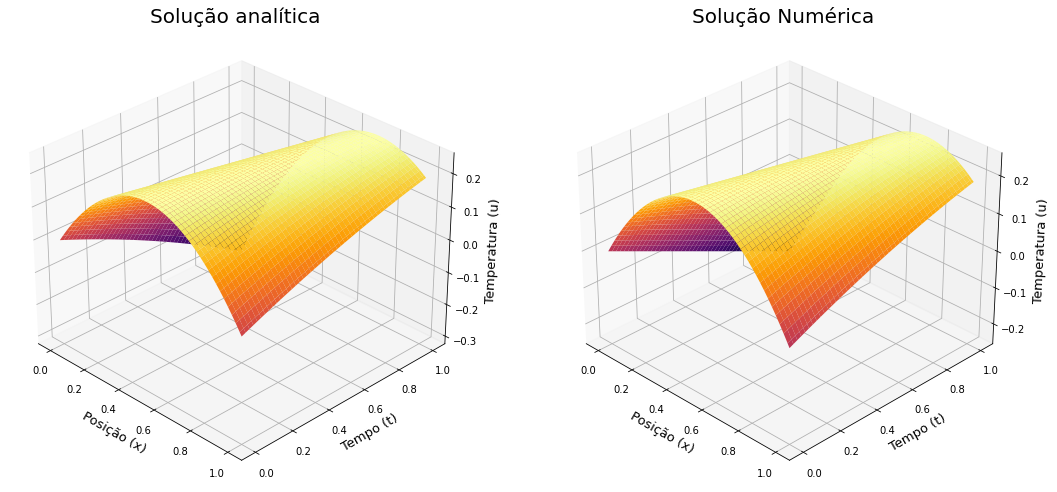

In [6]:
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(18, 9))

# solução analítica
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(T, X, ua, cmap='inferno')
ax1.view_init(elev=30, azim=-45)
ax1.set_title('Solução analítica', fontsize = 20)
ax1.set_xlabel('Posição (x)', fontsize = 13)
ax1.set_ylabel('Tempo (t)', fontsize = 13)
ax1.set_zlabel('Temperatura (u)', fontsize = 13)

# Solução numérica
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(T,X, un, cmap='inferno')
ax2.view_init(elev=30, azim=-45)
ax2.set_title('Solução Numérica', fontsize = 20)
ax2.set_xlabel('Posição (x)', fontsize = 13)
ax2.set_ylabel('Tempo (t)', fontsize = 13)
ax2.set_zlabel('Temperatura (u)', fontsize = 13)

plt.savefig(r'imagens\adveccao.png',dpi = 200)

## Gerando animação:

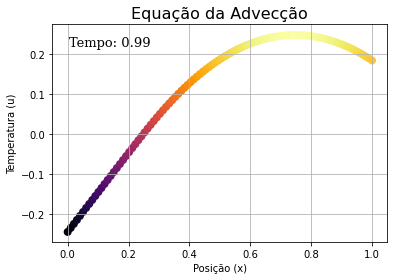

In [7]:
fig, ax = plt.subplots(1, 1)
ims = []
ax.set_xlabel('Posição (x)')
ax.set_ylabel('Temperatura (u)')
ax.set_title('Equação da Advecção', fontsize = 16)

ax.grid('--')
u_min = np.min(un)
u_max = np.max(un)
for i in range(0, len(un[0, :])):
    y = list(un[:, i])
    im = ax.scatter(x, y, c=y, cmap='inferno', linewidth=2, vmin=u_min, vmax=u_max)
    ims.append([im])
    time_label = ax.text(0.05, 0.9, f"Tempo: {i*Ht:.2f}", transform=ax.transAxes, color='black',fontfamily = 'serif', fontsize = 13 )
    ims[-1].append(time_label)

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=15, bitrate=9000)
ani.save(r"imagens\adveccao_ani.png", writer=writer, dpi=200)